<a href="https://colab.research.google.com/github/prudhivinath/Information-Gathering-/blob/main/Hiding_a_text_in_an_Image_using_Steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#import library
import cv2#opencv image
import numpy as np#array
import string
import os
import matplotlib.pyplot as plt

In [38]:
from google.colab import files
uploaded = files.upload()

Saving EncryptedImage.webp to EncryptedImage (1).webp


In [39]:
#ASCII Conversion
a = {chr(i): i for i in range(255)}
b = {i: chr(i) for i in range(255)}

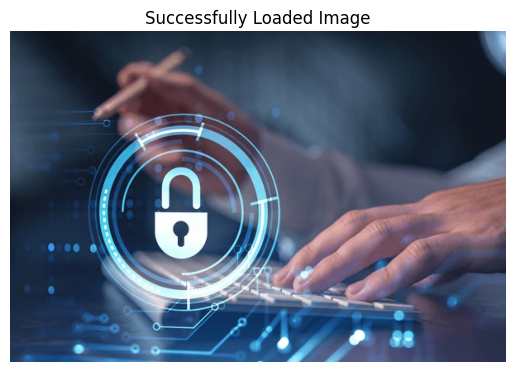

In [41]:
#Load the image
image_path = list(uploaded.keys())[0]
x = cv2.imread(image_path)
if x is None:
    print("Image not loaded. Check the filename.")
else:
    xrgb= cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    plt.imshow(xrgb)
    plt.axis('off')
    plt.title("Successfully Loaded Image")
    plt.show()

In [42]:
print(f"Image Shape: {x.shape}")

Image Shape: (400, 600, 3)


In [43]:
def text_to_binary(text):
  return ''.join([format(ord(char),'08b') for char in text])

In [44]:
def binary_to_text(binary):
  chars = [binary[i:i+8] for i in range(0, len(binary), 8)]
  return ''.join([chr(int(char, 2)) for char in chars])

In [46]:
def encode_text(img, secret_text):
  binary_secret = text_to_binary(secret_text) + '1111111111111110'
  data_index = 0
  total_bits = len(binary_secret)
  encoded_img = img.copy()
  for row in encoded_img:
    for pixel in row:
      for channel in range(3):
        if(data_index < total_bits):
          pixel[channel] = (pixel[channel] & 254) | int(binary_secret[data_index])
          data_index += 1
        else:
          break
  return encoded_img

In [47]:
def decode_text(img):
  binary_data = ""
  for row in img:
    for pixel in row:
      for channel in range(3):
        binary_data += str(pixel[channel] & 1)
  end_marker = '1111111111111110'
  end_idx = binary_data.find(end_marker)
  if(end_idx != -1):
    hidden_message = binary_to_text(binary_data[:end_idx])
    return hidden_message
  return "No hidden message found."

In [48]:
secret_message = "Hello from Google Colab steganography!"

In [53]:
stego_image = encode_text(x, secret_message)

In [54]:
stego_image_path = 'stego_image.png'
cv2.imwrite(stego_image_path, stego_image)

True

In [55]:
stego_image_loaded = cv2.imread(stego_image_path)

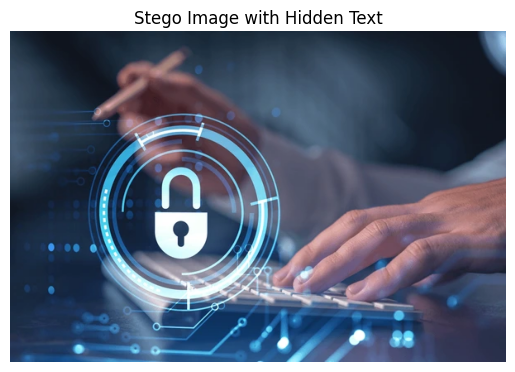

In [56]:
stego_image_rgb = cv2.cvtColor(stego_image_loaded, cv2.COLOR_BGR2RGB)
plt.imshow(stego_image_rgb)
plt.axis('off')
plt.title("Stego Image with Hidden Text")
plt.show()

In [57]:
print(f"Original Image Shape: {x.shape}")
print(f"Stego Image Shape: {stego_image_loaded.shape}")

Original Image Shape: (400, 600, 3)
Stego Image Shape: (400, 600, 3)


In [58]:
decoded_message = decode_text(stego_image_loaded)
print(f"Decoded Message: {decoded_message}")

Decoded Message: Hello from Google Colab steganography!
